# PCA Analysis

In [21]:
import sys
sys.path.append('/home/hamid/Desktop/EnsembleTools')

## Download from PED and Load Data

In [22]:
from dpet.ensemble import Ensemble
from dpet.ensemble_analysis import EnsembleAnalysis

ensembles = [
    Ensemble('PED00156e001', database='ped'), #The ensemble derived from Random pool
    Ensemble('PED00157e001', database='ped'), #The ensemble derived from Experimental pool
    Ensemble('PED00158e001', database='ped')
    
]
data_dir = '/home/hamid/PED_Data_analysis/nikola' 

analysis = EnsembleAnalysis(ensembles, data_dir)

In [23]:
analysis.load_trajectories()

Ensemble PED00156e001 already downloaded. Skipping.
File PED00156e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00156e001.
Ensemble PED00157e001 already downloaded. Skipping.
File PED00157e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00157e001.
Ensemble PED00158e001 already downloaded. Skipping.
File PED00158e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00158e001.
Loading trajectory for PED00156e001...
Loading trajectory for PED00157e001...
Loading trajectory for PED00158e001...


{'PED00156e001': <mdtraj.Trajectory with 100 frames, 941 atoms, 59 residues, without unitcells at 0x7c73147adc90>,
 'PED00157e001': <mdtraj.Trajectory with 100 frames, 939 atoms, 59 residues, without unitcells at 0x7c730d4f2990>,
 'PED00158e001': <mdtraj.Trajectory with 88 frames, 939 atoms, 59 residues, without unitcells at 0x7c730f74fe90>}

array([<Axes: title={'center': 'Average Distance Map: PED00156e001'}>,
       <Axes: title={'center': 'Average Distance Map: PED00157e001'}>,
       <Axes: title={'center': 'Average Distance Map: PED00158e001'}>,
       <Axes: >], dtype=object)

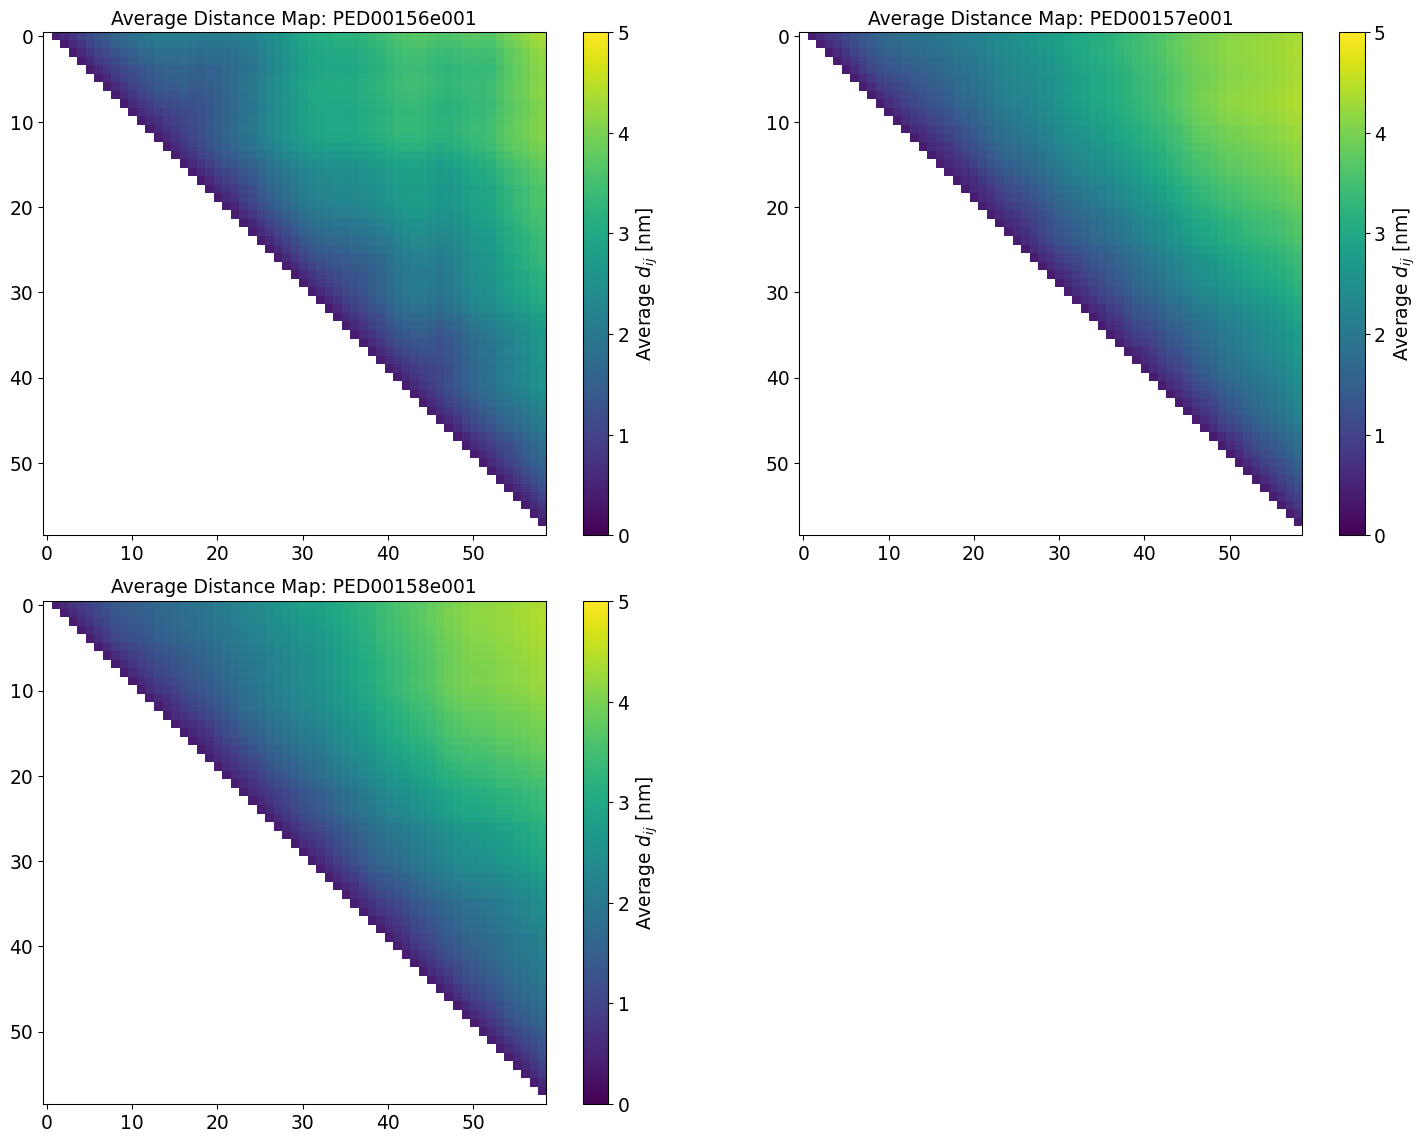

In [24]:
from dpet.visualization import Visualization


visualization = Visualization(analysis)
visualization.average_distance_maps()

## Featurization

In [25]:
analysis.extract_features(featurization='ca_dist')

Performing feature extraction for Ensemble: PED00156e001.
Transformed ensemble shape: (100, 1653)
Performing feature extraction for Ensemble: PED00157e001.
Transformed ensemble shape: (100, 1653)
Performing feature extraction for Ensemble: PED00158e001.
Transformed ensemble shape: (88, 1653)
Feature names: ['MET1-ALA3', 'MET1-ILE4', 'MET1-ALA5', 'MET1-LYS6', 'MET1-HIS7', 'MET1-ASP8', 'MET1-PHE9', 'MET1-SER10', 'MET1-ALA11', 'MET1-THR12', 'MET1-ALA13', 'MET1-ASP14', 'MET1-ASP15', 'MET1-GLU16', 'MET1-LEU17', 'MET1-SER18', 'MET1-PHE19', 'MET1-ARG20', 'MET1-LYS21', 'MET1-THR22', 'MET1-GLN23', 'MET1-ILE24', 'MET1-LEU25', 'MET1-LYS26', 'MET1-ILE27', 'MET1-LEU28', 'MET1-ASN29', 'MET1-MET30', 'MET1-GLU31', 'MET1-ASP32', 'MET1-ASP33', 'MET1-SER34', 'MET1-ASN35', 'MET1-TRP36', 'MET1-TYR37', 'MET1-ARG38', 'MET1-ALA39', 'MET1-GLU40', 'MET1-LEU41', 'MET1-ASP42', 'MET1-GLY43', 'MET1-LYS44', 'MET1-GLU45', 'MET1-GLY46', 'MET1-LEU47', 'MET1-ILE48', 'MET1-PRO49', 'MET1-SER50', 'MET1-ASN51', 'MET1-TYR52'

{'PED00156e001': array([[0.62181395, 0.8748281 , 1.0244368 , ..., 0.5381905 , 0.65995586,
         0.5500405 ],
        [0.6740468 , 0.94238734, 1.2103361 , ..., 0.696765  , 0.7199101 ,
         0.5397694 ],
        [0.54331213, 0.5967415 , 0.8770647 , ..., 0.6101002 , 0.9751156 ,
         0.68294644],
        ...,
        [0.69683045, 0.88360864, 1.1769351 , ..., 0.5458644 , 0.8227767 ,
         0.53999794],
        [0.58550507, 0.8509589 , 1.0959796 , ..., 0.5325418 , 0.539001  ,
         0.63170296],
        [0.5536332 , 0.6240836 , 0.865476  , ..., 0.65317243, 0.5724018 ,
         0.5386198 ]], dtype=float32),
 'PED00157e001': array([[0.5444462 , 0.7421228 , 0.8755765 , ..., 0.6166486 , 0.8442986 ,
         0.689368  ],
        [0.61922514, 0.89435095, 0.93977153, ..., 0.7174825 , 0.85039765,
         0.5540449 ],
        [0.69710505, 1.0575799 , 1.2049499 , ..., 0.57521105, 0.84521836,
         0.6335973 ],
        ...,
        [0.5811551 , 0.5352497 , 0.58276105, ..., 0.6435778 ,

## Dimensionality Reduction

In [29]:
analysis.reduce_features(method='pca',num_dim = 10)

Concatenated featurized ensemble shape: (288, 1653)
Concatenated featurized ensemble shape: (288, 1653)
Reduced dimensionality ensemble shape: (100, 10)
Reduced dimensionality ensemble shape: (100, 10)
Reduced dimensionality ensemble shape: (88, 10)


array([[-43.04741   ,  -3.8474998 ,   5.456339  , ...,   0.80151457,
         -0.05277491,  -5.5679855 ],
       [-41.733917  ,  -3.0202942 ,   4.9054074 , ...,  -6.4253283 ,
          1.9827524 ,  -1.7513155 ],
       [-44.86564   ,  -7.075902  ,   1.061019  , ...,  -6.3262677 ,
          5.169984  ,  -7.0961595 ],
       ...,
       [ -1.1950005 ,  32.226616  ,  -4.626478  , ...,  -2.4252653 ,
          0.48609388,   1.4477965 ],
       [ -6.639694  ,  12.238484  , -15.11279   , ...,   0.8516356 ,
         -1.4738965 ,  -1.3617352 ],
       [ 31.649015  ,  -0.18633874,   5.233555  , ...,  -1.428865  ,
          5.812221  ,   1.2737951 ]], dtype=float32)

## Analysis

<Axes: title={'center': 'Cumulative Explained Variance by PCA Dimension'}, xlabel='PCA dimension', ylabel='Cumulative explained variance %'>

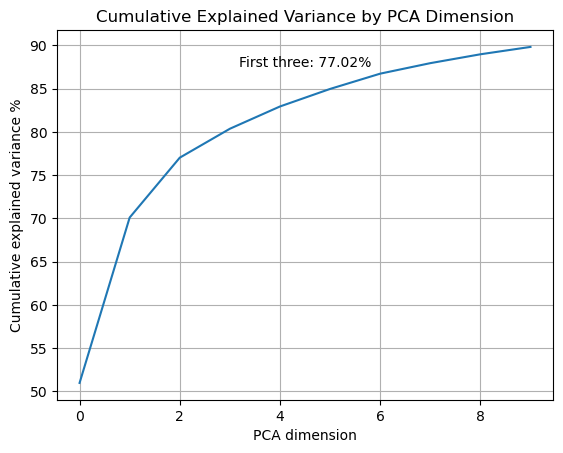

In [30]:
visualization.pca_cumulative_explained_variance()

### Plot 2D Landscapes

array([<Axes: title={'center': 'all'}, xlabel='pca dim 1', ylabel='pca dim 2'>,
       <Axes: title={'center': 'PED00156e001'}, xlabel='pca dim 1', ylabel='pca dim 2'>,
       <Axes: title={'center': 'PED00157e001'}, xlabel='pca dim 1', ylabel='pca dim 2'>,
       <Axes: title={'center': 'PED00158e001'}, xlabel='pca dim 1', ylabel='pca dim 2'>],
      dtype=object)

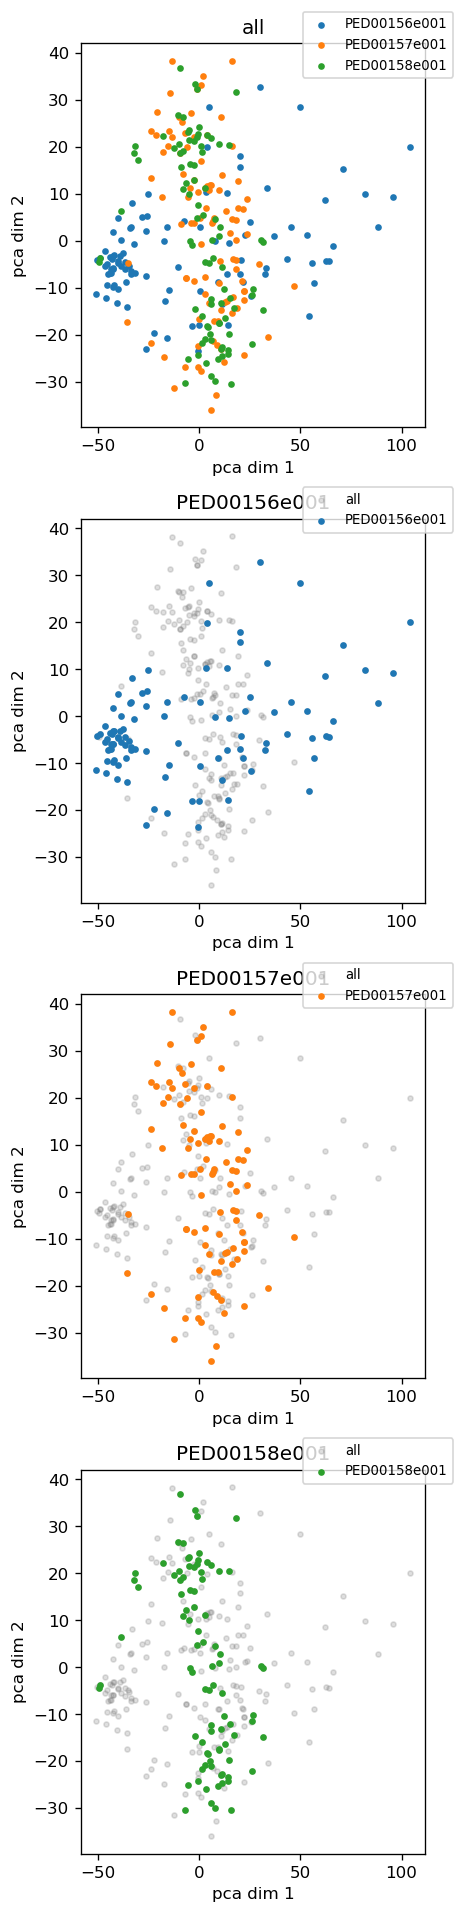

In [13]:
visualization.pca_2d_landscapes(save=True)

### 1D Histograms

array([<Axes: xlabel='Dim 1', ylabel='Density'>,
       <Axes: xlabel='Dim 1', ylabel='Density'>,
       <Axes: xlabel='Dim 1', ylabel='Density'>], dtype=object)

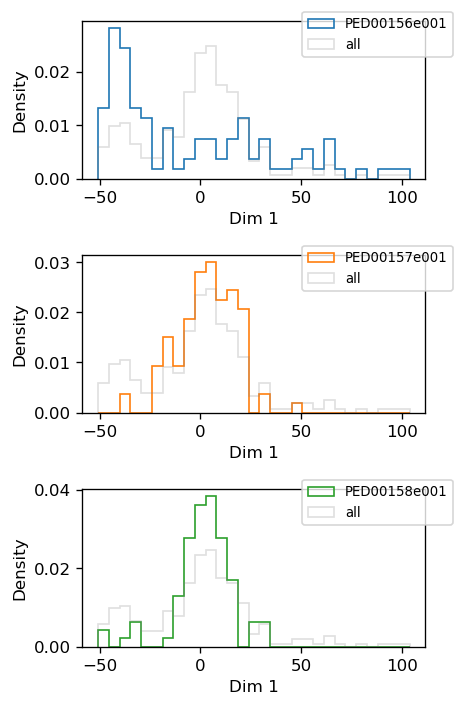

In [15]:
visualization.pca_1d_histograms(sel_dim=1)

### Is PC 1 from Ca-Ca correlated with Rg? For fully intrinsically disordered proteins, this is what happens.

An hallmark of fully-disordered ensembles at a global level is the following: when you do PCA with Ca-Ca distances, typically PC dimension 1 is strongly correlated with Rg, it describes changes in chain compactness. This is what happens in Sic1 ensembles too. 

array([<Axes: xlabel='Dim 1', ylabel='Rg'>,
       <Axes: xlabel='Dim 1', ylabel='Rg'>,
       <Axes: xlabel='Dim 1', ylabel='Rg'>], dtype=object)

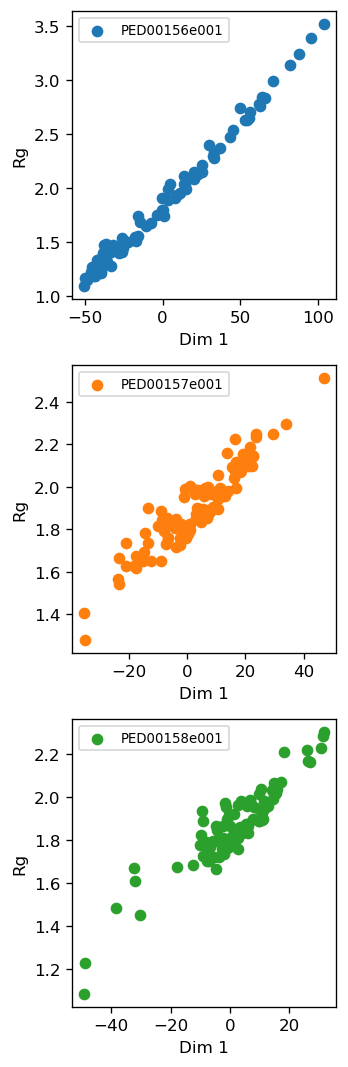

In [16]:
visualization.pca_rg_correlation()

array([<Axes: title={'center': 'Weight of $d_{ij}$ for PCA dim 1'}, xlabel='Residue j', ylabel='Residue i'>,
       <Axes: title={'center': 'Weight of $d_{ij}$ for PCA dim 2'}, xlabel='Residue j', ylabel='Residue i'>,
       <Axes: title={'center': 'Weight of $d_{ij}$ for PCA dim 3'}, xlabel='Residue j', ylabel='Residue i'>],
      dtype=object)

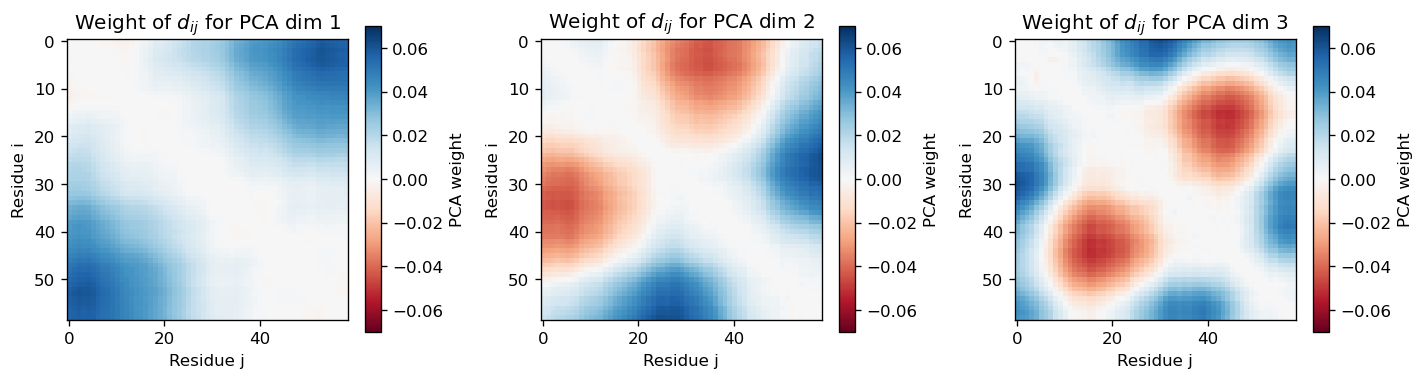

In [17]:
sel_dims = [0, 1, 2]  # Dimensionality reduction feature we want to analyze
visualization.pca_residue_correlation(sel_dims=sel_dims)